[Index](https://github.com/basilhan/ml-in-action/blob/master/README.md)

## Basic Bivariate Support Vector Machine

#### Introduction

This is a basic application of logistic regression to perform binary classification using 2 features.  

The dataset used is modified from the standard IRIS dataset. We only make use of the first 2 features (i.e. sepal length and sepal width) and we only consider the first 2 categories (i.e. setosa and versicolor).  

The purpose is to provide an intuitive feel of using support vector machine by demonstrating the result on a 2-dimensional grid. A similar example for logistic regression is [here](https://nbviewer.jupyter.org/github/basilhan/ml-in-action/blob/master/PythonBasicBivariateLogisticRegression.ipynb).  

The implementation language is Python.

#### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
%matplotlib inline

#### Convert the IRIS Dataset from Bunch to DataFrame Object

We will call our features simply $x_1$ and $x_2$.

In [2]:
iris = load_iris()
feature_names = iris.feature_names
df_features = pd.DataFrame(iris.data, columns=feature_names)
df_features = pd.DataFrame(iris.data, columns=["x1", "x2", "x3", "x4"])
df_features = df_features[["x1", "x2"]]
df_target = pd.DataFrame(iris.target, columns=["species"])
df = pd.concat([df_features, df_target], axis=1)
df.head()

,x1,x2,species
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


#### Remove Undesirable Points

We remove some points to artificially create a case where a linear model is able to achieve perfect classification.

In [3]:
# Category 0 (setosa)
df0 = df[df.species == 0]
df0 = df0[df0.x2 > 2.5]    # Remove future misclassified point
df0.head()

,x1,x2,species
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [4]:
# Category 1 (versicolor)
df1 = df[df.species == 1]
df1 = df1[df1.x2 < 3.4]    # Remove future misclassified point
df1.head()

,x1,x2,species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


#### Plot the Points

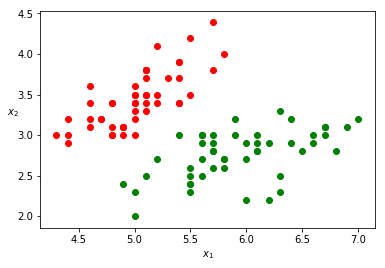

In [5]:
plt0 = plt.scatter(x=df0.x1, y=df0.x2, c='red')
plt1 = plt.scatter(x=df1.x1, y=df1.x2, c='green')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0);

Visually we can already imagine that a linear method is able to separate the 2 categories in this 2-dimensional feature space.

#### Prepare Features and Target for Modeling

In [6]:
X = pd.concat([df0, df1])[["x1", "x2"]]
X.head()

,x1,x2
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [7]:
y = pd.concat([df0, df1])["species"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

#### Fit the Model
We should get a perfect classifier (after removing some pesky points).

In [8]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)
model.score(X, y)

1.0

#### Check the Parameters

In [9]:
print(model.coef_)
print(model.intercept_)
print(model.support_vectors_)

[[ 5.0000286  -4.99927004]]
[-11.00246566]
[[ 5.   3. ]
 [ 5.5  3.5]
 [ 5.4  3. ]]


We see that $b = -11$, $w_1 = 5$ and $w_2 = -5$.  
Therefore, we expect the decision boundary line to be defined by the expression :

$$
-11 + 5x_1 -5x_2 = 0
$$

The weight parameters also define the vector $\begin{bmatrix} 5&-5 \end{bmatrix}^\top$ which is orthogonal to this line.  

For further information on model parameters, refer to [here](https://nbviewer.jupyter.org/github/basilhan/ml-concepts/blob/master/PythonHypothesisFunction.ipynb).  

Additionally, we also see that the support vectors are $\begin{bmatrix} 5.0&3.0 \end{bmatrix}^\top$, $\begin{bmatrix} 5.5&3.5 \end{bmatrix}^\top$ and $\begin{bmatrix} 5.4&3.0 \end{bmatrix}^\top$.

#### Plot the Points and Classifier

We now include the decision boundary line as well as the vector orthogonal to it in our plot. Note that the vector points towards the positive half-space. Points corresponding to the support vectors have been crossed.

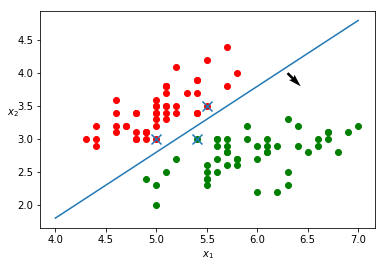

In [10]:
plt0 = plt.scatter(x=df0.x1, y=df0.x2, c='red')
plt1 = plt.scatter(x=df1.x1, y=df1.x2, c='green')
pltx = plt.scatter(x=model.support_vectors_[:, 0], y=model.support_vectors_[:, 1], marker='x', s=100)
x1 = np.linspace(4,7)
x2 = (-model.intercept_-model.coef_[0,0]*x1) / model.coef_[0,1]
plt.plot(x1, x2)
ax = plt.gca()
ax.quiver(6.3, 4, model.coef_[0,0], model.coef_[0,1])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0);

#### References
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Permalink : https://nbviewer.jupyter.org/github/basilhan/ml-in-action/blob/master/PythonBasicBivariateSupportVectorMachine.ipynb